In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
#Change numbers next to images and vae to get desired epoch and pretrain epoch
epochs=3
times_g=2

epochs+=-1
#real_path="real_images"+str(epochs)+"_vae"+str(pretrain_epochs)+".csv"
#fake_path="fake_images"+str(epochs)+"_vae"+str(pretrain_epochs)+".csv"

real_path="outputs/real_images"+str(epochs)+"_nG"+str(times_g)+".csv"
fake_path="outputs/fake_images"+str(epochs)+"_nG"+str(times_g)+".csv"

real=pd.read_csv(real_path,header=None)
fake=pd.read_csv(fake_path,header=None)
real.shape, fake.shape

((16, 12288), (16, 12288))

In [ ]:
epochs=2
for e in range(0,epochs+1):
    
    

In [5]:

scaler = StandardScaler()
real=scaler.fit_transform(real)

scaler= StandardScaler()
fake=scaler.fit_transform(fake)

## PCA
First we reduce dimension with PCA

Sum of explained variance for real: 0.932608668341
Sum of explained variance for fake: 0.945599716619


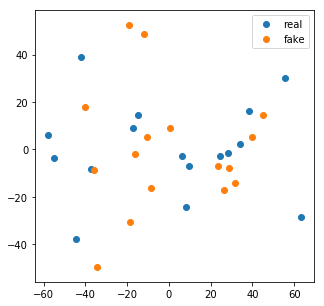

In [48]:
pca = PCA(n_components=10,svd_solver='arpack')
pca.fit(real)
real_pca = pca.transform(real)
print('Sum of explained variance for real:',pca.explained_variance_ratio_.sum())
pca.fit(fake)
fake_pca = pca.transform(fake)
print('Sum of explained variance for fake:',pca.explained_variance_ratio_.sum())

plt.figure( figsize=(5,5) )
plt.scatter(real_pca[:,0],real_pca[:,1],label='real')
plt.scatter(fake_pca[:,0],fake_pca[:,1],label='fake')
plt.legend()
plt.show()

## T-SNE

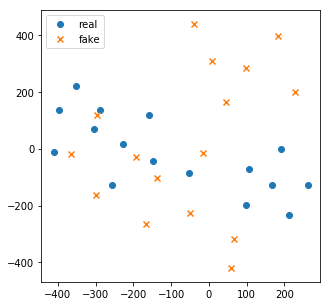

In [30]:
tsne=TSNE(n_components=2,perplexity=5)
real_tsne=tsne.fit_transform(real)
fake_tsne=tsne.fit_transform(fake)

plt.figure( figsize=(5,5) )
plt.scatter(real_tsne[:,0],real_tsne[:,1],label='real',marker='o')
plt.scatter(fake_tsne[:,0],fake_tsne[:,1],label='fake',marker='x')
plt.legend()
plt.show()

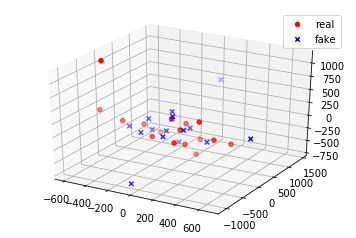

In [54]:
from mpl_toolkits.mplot3d import Axes3D
tsne=TSNE(n_components=3,perplexity=5)
real_tsne=tsne.fit_transform(real)
fake_tsne=tsne.fit_transform(fake)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(real_tsne[:,0], real_tsne[:,1], real_tsne[:,2], c='r', marker='o',label='real')
ax.scatter(fake_tsne[:,0], fake_tsne[:,1], fake_tsne[:,2], c='b', marker='x',label='fake')
ax.legend()
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

plt.show()

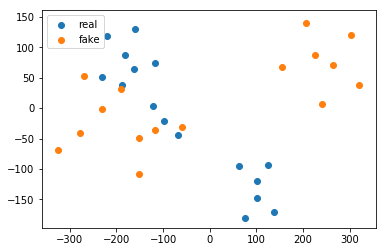

In [11]:
#With data passed first through PCA
tsne=TSNE(n_components=2,perplexity=2)
real_tsne_p=tsne.fit_transform(real_pca)
fake_tsne_p=tsne.fit_transform(fake_pca)

plt.scatter(real_tsne_p[:,0],real_tsne_p[:,1],label='real')
plt.scatter(fake_tsne_p[:,0],fake_tsne_p[:,1],label='fake')
plt.legend()
plt.show()

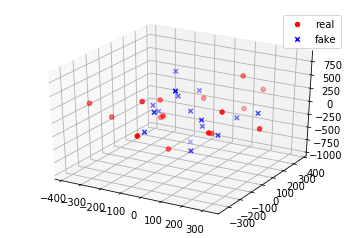

In [47]:
tsne=TSNE(n_components=3,perplexity=5)
real_tsne=tsne.fit_transform(real_pca)
fake_tsne=tsne.fit_transform(fake_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(real_tsne[:,0], real_tsne[:,1], real_tsne[:,2], c='r', marker='o',label='real')
ax.scatter(fake_tsne[:,0], fake_tsne[:,1], fake_tsne[:,2], c='b', marker='x',label='fake')
ax.legend()
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

plt.show()